Resultados esperados:
 - input: 
    - avg_runtime
    - input_complexity
    - speedup
    - p_cores
 - output: 
    - eficiencia


In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [200]:
df_clean = pd.read_csv("dataset/clean_data.csv")

# df_clean = df_clean.round(decimals=2)

# df_clean['cores'] = df_clean['cores']/df_clean['cores'].max()
# df_clean['input'] = df_clean['input']/df_clean['input'].max()

In [3]:
df_clean.columns

Index(['cores', 'input', 'average_runtime', 'speedup', 'efficiency'], dtype='object')

In [201]:
X = df_clean[['cores', 'input', 'average_runtime', 'speedup']].values
y = df_clean['efficiency'].values

### Regression Models

#### MLP Regression Model

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)

In [216]:
learning_rate = 0.001
input_shape = X_train.shape[1]

model = MLPRegressor(hidden_layer_sizes=(64, 64),
                     activation='relu',
                     solver='adam',
                     learning_rate_init=learning_rate,
                     max_iter=100,
                     early_stopping=True,
                     n_iter_no_change=20,
                     random_state=40,
                     verbose=True
                    )

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")

Iteration 1, loss = 2.07567542
Validation score: -15.218138
Iteration 2, loss = 0.83627212
Validation score: -7.544398
Iteration 3, loss = 0.53444982
Validation score: -4.728201
Iteration 4, loss = 0.24653482
Validation score: -2.816838
Iteration 5, loss = 0.26270334
Validation score: -1.570817
Iteration 6, loss = 0.43516380
Validation score: -0.878704
Iteration 7, loss = 0.51429484
Validation score: -0.467706
Iteration 8, loss = 0.34902495
Validation score: -0.575645
Iteration 9, loss = 0.12721689
Validation score: -0.999262
Iteration 10, loss = 0.08236009
Validation score: -1.250558
Iteration 11, loss = 0.12195735
Validation score: -1.232463
Iteration 12, loss = 0.15478986
Validation score: -1.232706
Iteration 13, loss = 0.14880288
Validation score: -1.251855
Iteration 14, loss = 0.10554457
Validation score: -0.982115
Iteration 15, loss = 0.06448586
Validation score: -0.485768
Iteration 16, loss = 0.04293449
Validation score: 0.118853
Iteration 17, loss = 0.03757934
Validation score:

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [217]:
loss = mean_squared_error(y_test, y_pred_test)
print(f'Erro no conjunto de teste: {loss}')

for i in range(10):
    print(f'Valor Real: {y_test[i]}, Previsão: {y_pred_test[i]}')

Erro no conjunto de teste: 0.0017823278479305478
Valor Real: 0.7987678192623822, Previsão: 0.7373011788353261
Valor Real: 0.2576656071333969, Previsão: 0.22774615395917633
Valor Real: 0.0978113630128791, Previsão: 0.10071056160094763
Valor Real: 0.0395369320423208, Previsão: 0.05536008681518825
Valor Real: 0.5126925506363381, Previsão: 0.5448839521838083
Valor Real: 0.5498949336204325, Previsão: 0.46474076689301347
Valor Real: 0.9076074836168472, Previsão: 1.0173960948315564
Valor Real: 1.0, Previsão: 0.9483870541332062
Valor Real: 0.281619991214921, Previsão: 0.27079792648997203
Valor Real: 0.4542886268470946, Previsão: 0.41280010789778343


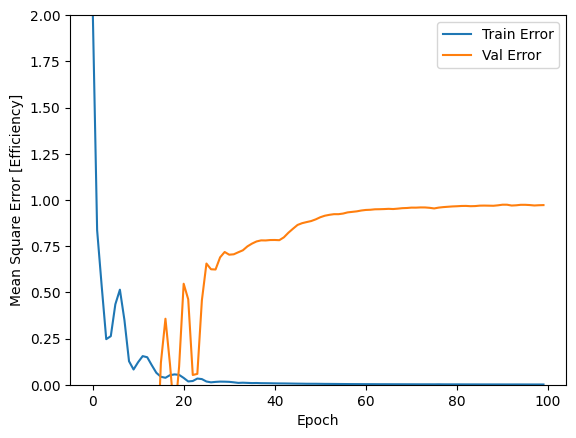

In [218]:
def plot_history(model):
    train_mse_history = model.loss_curve_
    val_mse_history = model.validation_scores_
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Efficiency]')
    plt.plot(train_mse_history, label='Train Error')
    plt.plot(val_mse_history, label='Val Error')

    plt.ylim([0, 2])
    plt.legend()
    plt.show()

plot_history(model)

#### MLP Regression Model with Leave-One-Out-Validation (LOOCV)

In [31]:
loo = LeaveOneOut()
mse_scores = []
callback = EarlyStopping(monitor="loss", patience=20)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))


for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    learning_rate = 0.001
    input_shape = (X_train.shape[1],)

    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=100, verbose=0, callbacks=[callback])

    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    mse_scores.append(mse)

print(f'Erro médio quadrático usando LOOCV: {min(mse_scores)}')

1/1 [==============================] - 0s 28ms/step
Erro médio quadrático usando LOOCV: 2.8544541688845848e-11


In [28]:
PATH_MODEL_SAVE = "model/pascal_model_v2.keras"

model.save(PATH_MODEL_SAVE)